### Writing an iterator to load data in chunks (5)
This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

Loading of the file chunk by chunk,
Creating the new column of urban population values, and
Plotting the urban population data.
That's a lot of work, but the function now makes it convenient to repeat the same process for whatever file and country code you want to process and visualize!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot has been imported as pd and plt respectively for your use.

After you are done, take a moment to look at the plots and reflect on the new skills you have acquired. The journey doesn't end here! If you have enjoyed working with this data, you can continue exploring it using the pre-processed version available on Kaggle.

### Instructions

- Define the function plot_pop() that has two arguments: first is filename for the file to process and second is country_code for the country to be processed in the dataset.
- Call plot_pop() to process the data for country code 'CEB' in the file 'ind_pop_data.csv'.
- Call plot_pop() to process the data for country code 'ARB' in the file 'ind_pop_data.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


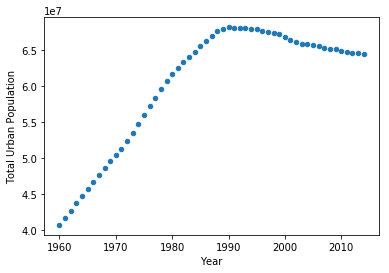

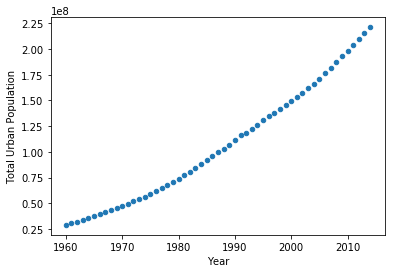

In [3]:
# Define plot_pop()
def plot_pop(filename, country_code):


    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
